## **Regularization**

**Overfitting**
If however, the network has too much expressive power (too many perceptrons or
equivalently too many weights) relative to the number of training instances - the network can and often will rote remember the training instances. This phenomenon is
called overfitting.

**Underfitting**
To be sure, there is another phenomenon called underfitting. This is when the network simply does not have enough expressive power to model the training data. The
symptom of underfitting is that the network performs bad on both training and testing
data.

**Regularization** is any modification we make to a
learning algorithm that is intended to reduce its
generalization error but not its training error.

Training a neural network involves creating a mapping between an array of input variables $\textbf{x}$ to an independent variable, often called $\text{y}$. Recall that a mapping between such variables can be expressed mathematically, and that a mapping is represented by a function - say, $f$. In this case, the mapping of the actual function is as follows: $\text{y}: f(\textbf{x})$.

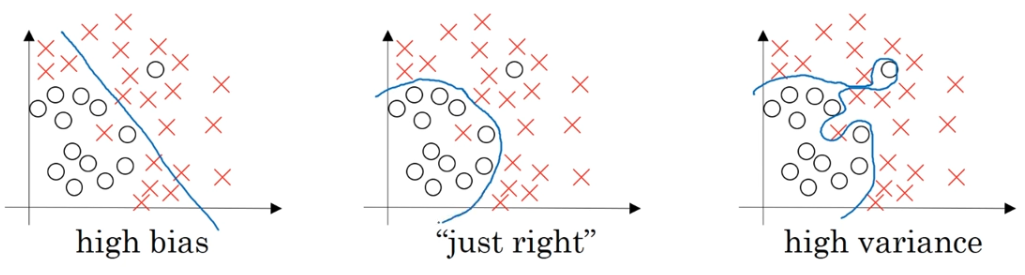


**굵은 텍스트**![image.png](attachment:image.png)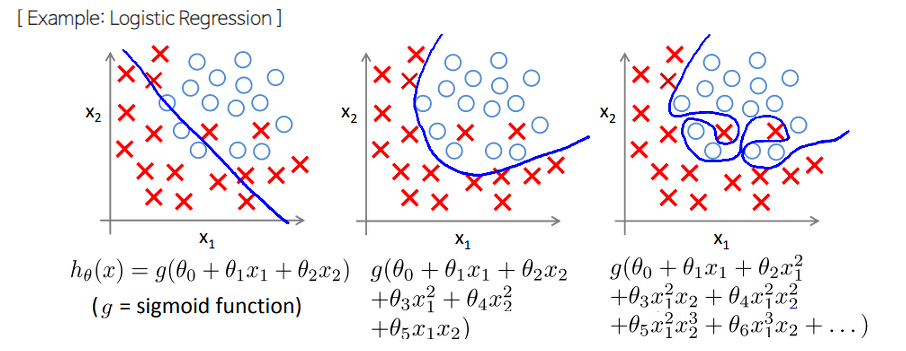

![image.png](attachment:image.png)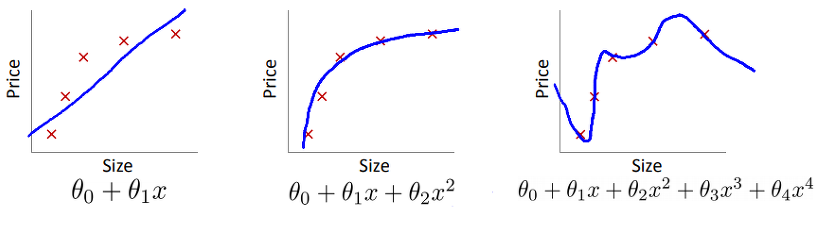

- Constraints with norm penalty (L1 vs L2 regularization)
- Dropout
- Early stopping

## L1 and L2 Regularization

- L1 and L2 regularization are two common regularization techniques that are used to prevent overfitting in machine learning models.
- Both L1 and L2 regularization add a penalty to the cost function, which is added to the sum of the squared weights in the case of L2 regularization and the sum of the absolute weights in the case of L1 regularization.
- The regularization term is multiplied by a regularization parameter, which determines the strength of the regularization.
- L1 regularization is also known as Lasso regularization, while L2 regularization is also known as Ridge regularization.

Occam’s Razor is a philosophical principle. Its literal translation from Latin states
"Entities should not be multiplied beyond necessity”. This is roughly taken to mean
*simplest explanation is the best or the more limited, if adequate, is preferable*

In machine learning, this principle is typically interpreted as: *among the set of candidate neural network parameter values (weights and biases) that minimize the loss, the ”simplest”
one should be chosen.*

To avoid overfitting, we can add a penalty term to the cost function that penalizes large weights. This is known as regularization. There are two common types of regularization: L1 regularization and L2 regularization.

Our goal is $minimize \ \ \mathrm{L}(w) +\lambda R(w)$

R(w) is the regularization term, which is the sum of the absolute values of the weights for L1 regularization and the sum of the squares of the weights for L2 regularization.
\lambda is the regularization parameter, which determines the strength of the regularization.

- L1 norm penalty : $||w||_1 = \sum_{i=1}^{n} |w_i|$

- L2 norm penalty : $||w||_2 = \sqrt{\sum_{i=1}^{n} w_i^2}$

*이탤릭체 텍스트*![image.png](attachment:image.png)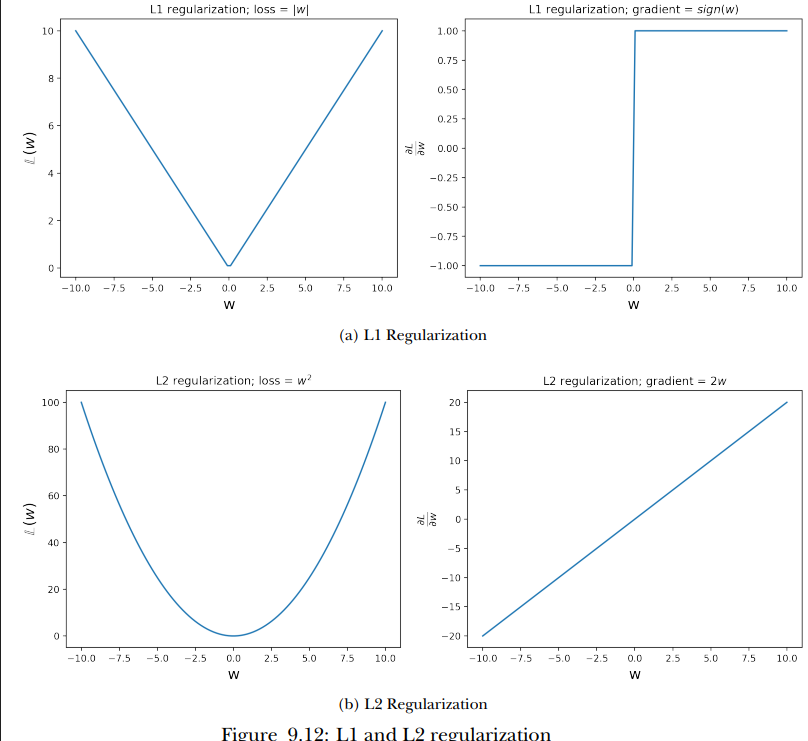

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Linear Regression Problem description

In [ ]:
# Importing csv dataset with pandas
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

# Extrating year and month from data
data['year'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).year
data['month'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).month

# Using only temp data for Los Angeles in October
data = data.loc[data['City'] == 'Los Angeles']
data = data.loc[data['month'] == 10]

# Looking at the first 5 rows of dataset
data.head()

In [ ]:
# Using Year as X_values and price as Y_values, we want to predict the temperature
# in LA in a future year
points = data[['year', 'AverageTemperature']].to_numpy()

# Looking at the plot of the points, we can see a linear trend
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.scatter(points[:,0], points[:,1])
plt.show()

### Linear Regression and Gradient Descent
In Linear Regression, our goal is to find the parameters that minimises the mean sum of squared error function:

$$
E(m,b) =  \frac{1}{2N} \sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2
$$

Regularization is a very important technique in machine learning to prevent overfitting and ensure that the model generalizes well to new data. Generally, there are two forms of regularization - L1 and L2.

#### With L1 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{2N} + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


#### With L2 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel^2\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{N} m + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


As it can be observed, the partial derivative with respect to b does not vary with regularization.

In [ ]:
# Computes mean sum of squared error for all data points
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [ ]:
def step_gradient(b_current, m_current, points, learningRate, lam, regularizer):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))

    # Iterating over all points
    for i in range(0, len(points)):
        # Getting x and y values
        x = points[i, 0]
        y = points[i, 1]

        # Calculating gradients according to regularization
        if regularizer == 'L1':
            m_gradient += (lam/(2*N) -(x/N) * (y - ((m_current * x) + b_current)))
        elif regularizer == 'L2':
            m_gradient += (lam/N*m_current - (x/N) * (y - ((m_current * x) + b_current)))
        elif regularizer == 'ElasticNet':
            m_gradient += (lam/N*m_current - (x/N) * (y - ((m_current * x) + b_current)))+ (lam/(2*N) -(x/N) * (y - ((m_current * x) + b_current)))
        else:
            m_gradient += -(x/N) * (y - ((m_current * x) + b_current))

        b_gradient += -(1/N) * (y - ((m_current * x) + b_current))

    # Updating b and m with learningrate * gradients
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [ ]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations, lam, regularizer): #optimizer.step()
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate, lam, regularizer)
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter, lam, regularizer=None):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations, lam, regularizer)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [ ]:
# Hyperparameters
learning_rate = 0.0000001 # gradient step size
iterations = 500
lamb = 500 # Regularization parameter

# Linear Regression with L1
b1, m1 = run(learning_rate, iterations, lamb, 'L1')

# Linear Regression with L2
b2, m2 = run(learning_rate, iterations, lamb, 'L2')

b3, m3 = run(learning_rate, iterations, lamb, 'ElasticNet')

# Linear Regression without Regularization
b4, m4 = run(learning_rate, iterations, lamb)

In [ ]:
# Comparing best-fit line with dataset
f, ax = plt.subplots(figsize=(14, 5))
ax.set_xlabel('Year')
ax.set_ylabel('Av. Temp in October (Degrees Celcius)')
plt.plot(points[:,0], predict(b1, m1, points[:,0]), label='L1')
plt.plot(points[:,0], predict(b2, m2, points[:,0]), label='L2')
plt.plot(points[:,0], predict(b3, m3, points[:,0]), label='ElasticNet')
plt.plot(points[:,0], predict(b4, m4, points[:,0]), label='None')
plt.scatter(points[:,0], points[:,1])
plt.legend()
plt.show()

#### L1 vs L2 Regularization

- L1 regularization tends to produce sparse weight vectors, which can be useful for feature selection, while L2 regularization tends to produce dense weight vectors.
- L1 regularization is more robust to outliers than L2 regularization, but L2 regularization is more computationally efficient.

![image.png](attachment:image.png)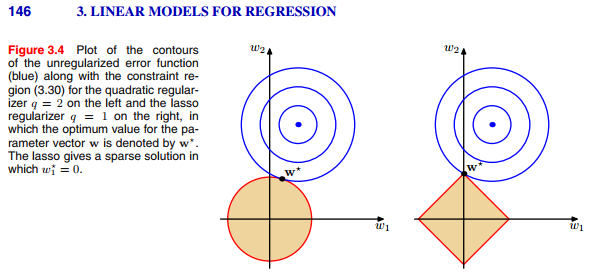

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x=np.arange(-1,1,0.1)
y=0.5*x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual function, w=0.5')
plt.show()

In [ ]:
x=np.arange(-1,1,0.1)
y=0.5*x

w=np.arange(-1,1,0.1) # range of weights to explore -1~1
errors=[]
for weight in w:
    error=(y-weight*x)**2
    errors.append(np.mean(error)) #mean squared error

In [ ]:
plt.plot(w,errors)
plt.title('Unregularized loss')
plt.xlabel('possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])

In [ ]:
lmb=0.5 #lambda for loss
def l1reg(w, lmb):
    return lmb*np.absolute(w)
reg1 = l1reg(w, lmb) #l1 reg
plt.figure(1)
plt.plot(w, reg1)
plt.title('Losses for only L1 regularization term')
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])


In [ ]:
def l2reg(w, lmb):
    return lmb*(w**2)
reg2 = l2reg(w, lmb) #L2 reg
plt.figure(2)
plt.plot(w, reg2)
plt.title('Losses for only L2 regularization term')
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])

In [ ]:
plt.figure(2)
plt.plot(w, reg2+reg1)
plt.title('Losses for L1 + L2 regularization term')
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])

In [ ]:
plt.figure(1)
plt.plot(w, errors, ':k', label='Unregularized')
plt.plot(w, reg1+errors, 'b', label='L1 regularized')
plt.plot(w, reg2+errors, 'r', label='L2 regularized')
plt.plot(w, reg1+reg2+errors, 'g', label='ElasticNet regularized')
plt.title('L1/L2 Regularized loss (lambda=0.5)')
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend()

# plt.title('L2 Regularized loss')
# plt.xlabel('Possible weights')
# plt.ylabel('Loss')
# plt.ylim([0,2])

In [ ]:
lmbdamax=5
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.plot(w, errors)
for lmbda in np.arange(0, lmbdamax, 1):
    reg = l2reg(w, lmbda)
    plt.subplot(3,1,2)
    plt.plot(w, reg, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={}'.format(lmbda))
    plt.subplot(3,1,3)
    plt.plot(w, reg+errors, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={}'.format(lmbda))

plt.subplot(3,1,1)
# plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.title('Unregularized loss')
plt.subplot(3,1,2)
# plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.title('Loss due to lambda')
plt.legend()
plt.subplot(3,1,3)
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.title('Regularized loss')
plt.legend()
plt.show()

In [ ]:
lmbdamax=5
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.plot(w, errors)
for lmbda in np.arange(0, lmbdamax, 1):
    reg = l1reg(w, lmbda)
    plt.subplot(3,1,2)
    plt.plot(w, reg, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={}'.format(lmbda))
    plt.subplot(3,1,3)
    plt.plot(w, reg+errors, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={}'.format(lmbda))

plt.subplot(3,1,1)
# plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.title('Unregularized loss')
plt.subplot(3,1,2)
# plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.title('Loss due to lambda')
plt.legend()
plt.subplot(3,1,3)
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.title('Regularized loss')
plt.legend()
plt.show()

![image.png](attachment:image.png)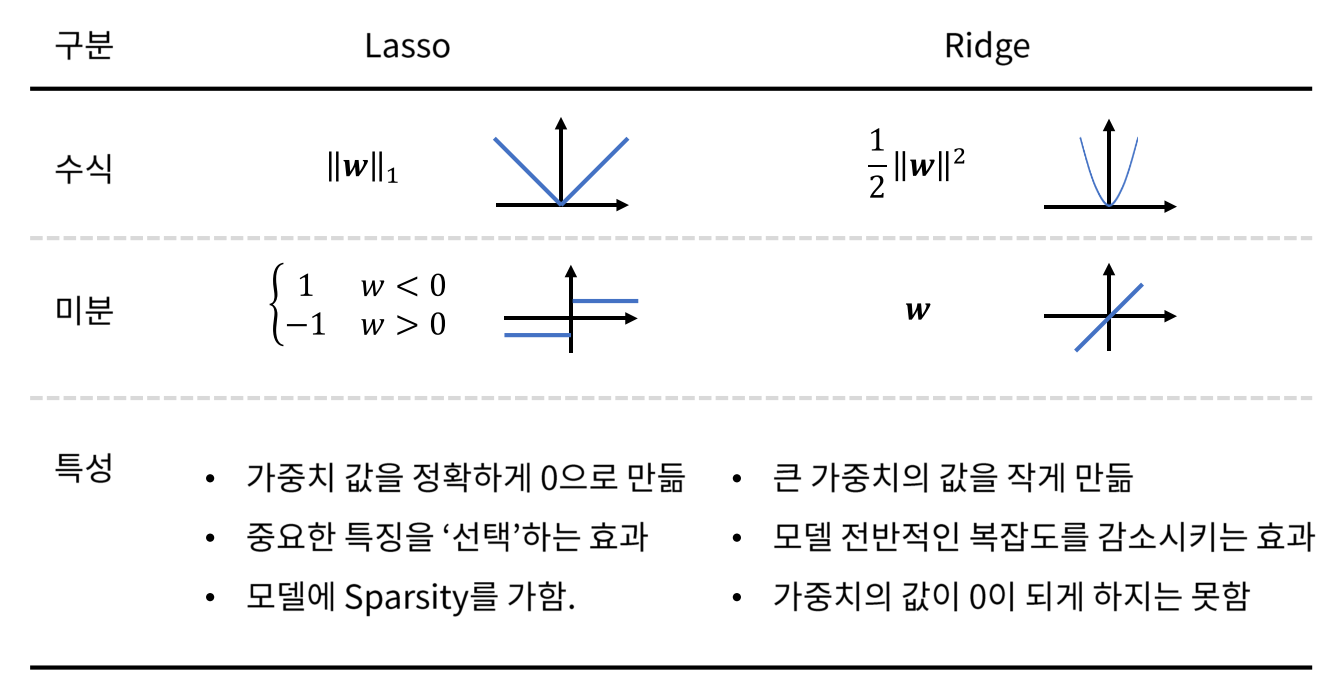

### L1 and L2 Regularization in PyTorch with Deep learning


In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms


In [ ]:
dataset = MNIST('data/', download=True, transform=transforms.ToTensor()) # Load the MNIST dataset

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))

for i in range(10):
    image, label = dataset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')  # 축 숨기기

plt.show()

In [ ]:
#L1 Regularization


class MLP(nn.Module): # Multilayer perceptron
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l1_loss(self, w): # L1 regularization
      return torch.abs(w).sum()


if __name__ == '__main__':

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare MNIST dataset
  dataset = MNIST('data/', download=True, transform=transforms.ToTensor()) # Load the MNIST dataset
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1) # Create a DataLoader

  # Initialize the MLP
  mlp = MLP()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss() # Cross-entropy loss
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4) # Adam optimizer

  # Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = mlp(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Compute L1 loss component
      l1_weight = 1.0
      l1_parameters = [] # Keep all parameters with L1 regularization
      for parameter in mlp.parameters(): # Iterate over all model parameters
          l1_parameters.append(parameter.view(-1))
      l1 = l1_weight * mlp.compute_l1_loss(torch.cat(l1_parameters)) # Compute the L1 loss

      # Add L1 loss component
      loss += l1

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      minibatch_loss = loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.5f (of which %.5f L1 loss)' %
                (i + 1, minibatch_loss, l1))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

In [ ]:
# L2 Regularization
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

class MLP(nn.Module): # Multilayer perceptron
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l2_loss(self, w):   # L2 regularization
      return torch.square(w).sum()


if __name__ == '__main__':

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  dataset = MNIST('data/', download=True, transform=transforms.ToTensor()) # Load the MNIST dataset
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1) # Create a DataLoader

  # Initialize the MLP
  mlp = MLP()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

  # Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = mlp(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Compute l2 loss component
      l2_weight = 1.0
      l2_parameters = [] # Keep all parameters with L2 regularization
      for parameter in mlp.parameters():
          l2_parameters.append(parameter.view(-1))
      l2 = l2_weight * mlp.compute_l2_loss(torch.cat(l2_parameters)) # Compute the L2 loss

      # Add l2 loss component
      loss += l2

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      minibatch_loss = loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.5f (of which %.5f l2 loss)' %
                (i + 1, minibatch_loss, l2))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

In [ ]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4, weight_decay=1.0) # L2 regularization as weight decay

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28 * 28 * 1, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l1_loss(self, w):
      return torch.abs(w).sum()

  def compute_l2_loss(self, w):
      return torch.square(w).sum()


if __name__ == '__main__':

  # Set fixed random number seed
  torch.manual_seed(42)

  # Prepare CIFAR-10 dataset
  dataset = MNIST('data/', download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

  # Initialize the MLP
  mlp = MLP()

  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

  # Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

      # Get inputs
      inputs, targets = data

      # Zero the gradients
      optimizer.zero_grad()

      # Perform forward pass
      outputs = mlp(inputs)

      # Compute loss
      loss = loss_function(outputs, targets)

      # Specify L1 and L2 weights : linear combination of L1 and L2
      l1_weight = 0.3
      l2_weight = 0.7

      # Compute L1 and L2 loss component
      parameters = []
      for parameter in mlp.parameters():
          parameters.append(parameter.view(-1))
      l1 = l1_weight * mlp.compute_l1_loss(torch.cat(parameters))
      l2 = l2_weight * mlp.compute_l2_loss(torch.cat(parameters))

      # Add L1 and L2 loss components
      loss += l1
      loss += l2

      # Perform backward pass
      loss.backward()

      # Perform optimization
      optimizer.step()

      # Print statistics
      minibatch_loss = loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.5f (of which %.5f L1 loss; %0.5f L2 loss)' %
                (i + 1, minibatch_loss, l1, l2))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

### Dropout
- Finally, dropout is a widely used regularization technique that is specific to deep learning. It randomly shuts down some neurons in each iteration.
- Dropout is a regularization technique that is used to prevent overfitting in deep learning models.
- Dropout works by randomly setting a fraction of the input units to zero in each iteration of training, which prevents the model from becoming too dependent on any one input unit.
- Dropout is a form of ensemble learning, where multiple models are trained on different subsets of the data and combined to make predictions.
- Dropout is a very effective regularization technique that can improve the generalization performance of deep learning models.

**굵은 텍스트**![image.png](attachment:image.png)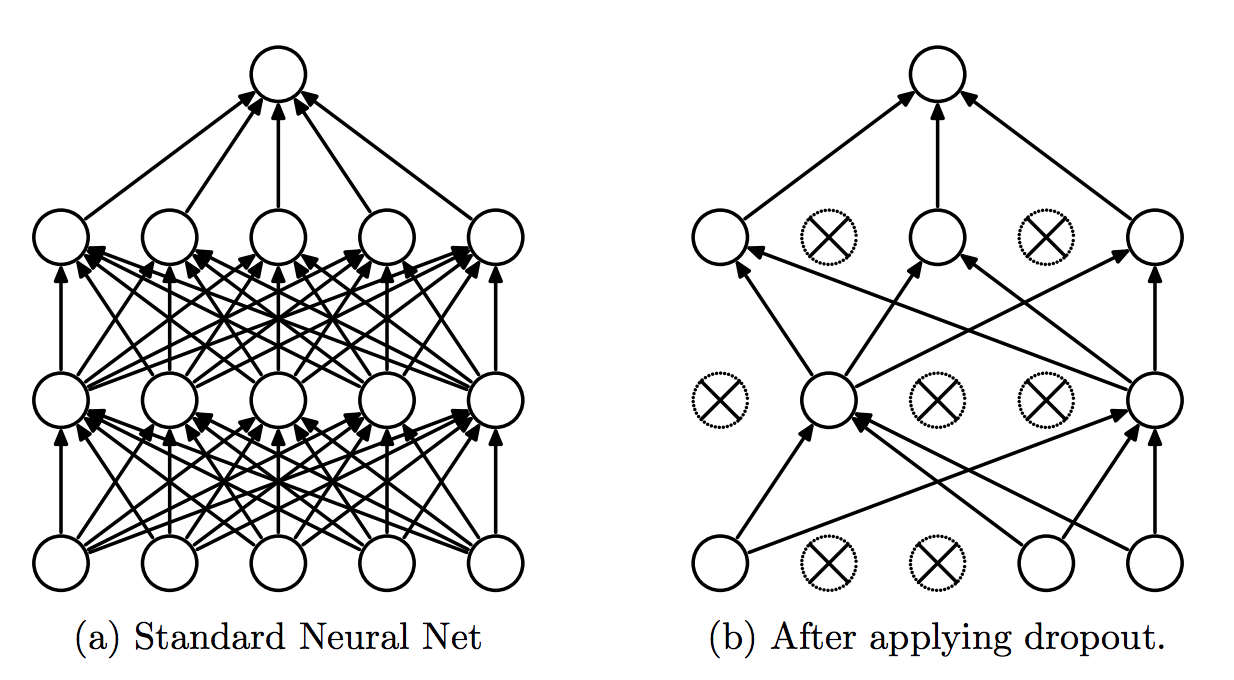

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import time
import h5py
from scipy.ndimage.interpolation import rotate

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler

# import pymc3 as pm

### Dropout Implementation

Below is the dropout layer we implemented, based on PyTorch.

We should multiply the dropout output by $\frac{1}{1-p}$ where $p$ is the dropout rate to compensate for the dropped neurons. We implemented a dropout layer below, it should have same functionality as `nn.Dropout` in Pytorch.

We used `MyDropout` in our first example network as a demonstration of its functionality; we managed to reproduce the results when replacing `MyDropout` by `nn.Dropout` (data not shown). We used `nn.Dropout` for all remaining networks since `nn.Dropout` is more efficient than our implementation.

In [ ]:
class MyDropout(nn.Module):
    def __init__(self, p=0.5):
        super(MyDropout, self).__init__()
        self.p = p
        # multiplier is 1/(1-p). Set multiplier to 0 when p=1 to avoid error...
        if self.p < 1:
            self.multiplier_ = 1.0 / (1.0-p)
        else:
            self.multiplier_ = 0.0
    def forward(self, input):
        # if model.eval(), don't apply dropout
        if not self.training:
            return input

        # So that we have `input.shape` numbers of Bernoulli(1-p) samples
        selected_ = torch.Tensor(input.shape).uniform_(0,1)>self.p

        # To support both CPU and GPU.
        if input.is_cuda:
            selected_ = Variable(selected_.type(torch.cuda.FloatTensor), requires_grad=False)
        else:
            selected_ = Variable(selected_.type(torch.FloatTensor), requires_grad=False)

        # Multiply output by multiplier as described in the paper [1]
        return torch.mul(selected_,input) * self.multiplier_

####  Dropout as Regularization

In this section, we want to show dropout can be used as a regularization technique for deep neural networks. It can reduce the overfitting and make our network perform better on test set (**like L1 and L2 regularization we saw in AM207 lectures**). We will first do a multilayer perceptron (fully connected network) to show dropout works and then do a LeNet (a convolutional neural network) to show dropout is also useful for different network architectures.

We use MNIST (as we see in homework) as our sample dataset. This dataset has images of hand written digits and the labels of the ground truth digits. Code cell below loads the dataset and shows 10 training samples.

In [ ]:
transform = transforms.ToTensor()

trainset = datasets.MNIST(root='data/', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='data/', train=False, transform=transform)

# Visualize 10 image samples in MNIST dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = next(dataiter)
# plot 10 sample images
_,ax = plt.subplots(1,10)
ax = ax.flatten()
iml = images[0].numpy().shape[1]
[ax[i].imshow(np.transpose(images[i].numpy(),(1,2,0)).reshape(iml,-1),cmap='Greys') for i in range(10)]
[ax[i].set_axis_off() for i in range(10)]
plt.show()
print('label:',labels[:10].numpy())
print('image data shape:',images[0].numpy().shape)

####  Multilayer Perceptron

We first build a multilayer perceptron (MLP), and use the code below to define the network as described in paper [[1](#Reference)]. This network has 2 hidden layer with 800 hidden units per hidden layer. To show our implementation of Dropout above is correct, we use `MyDropout` here.

In [ ]:
class MLP(nn.Module):
    def __init__(self, hidden_layers=[800, 800], droprates=[0, 0]):
        super(MLP, self).__init__()
        self.model = nn.Sequential()
        self.model.add_module("dropout0",MyDropout(p=droprates[0]))
        self.model.add_module("input", nn.Linear(28*28, hidden_layers[0]))
        self.model.add_module("tanh", nn.Tanh())

        # Add hidden layers
        for i,d in enumerate(hidden_layers[:-1]):
            self.model.add_module("dropout_hidden"+str(i+1), MyDropout(p=droprates[1]))
            self.model.add_module("hidden"+str(i+1), nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            self.model.add_module("tanh_hidden"+str(i+1), nn.Tanh())
        self.model.add_module("final",nn.Linear(hidden_layers[-1], 10))
        # nn.dropout
    def forward(self, x):
        # Turn to 1D
        x = x.view(x.shape[0], 28*28)
        x = self.model(x)
        return x

In [ ]:
class MLPClassifier:
    def __init__(self, hidden_layers=[800, 800], droprates=[0, 0], batch_size=128, max_epoch=10, \
                 lr=0.1, momentum=0):
        # Wrap MLP model
        self.hidden_layers = hidden_layers
        self.droprates = droprates
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        self.model = MLP(hidden_layers=hidden_layers, droprates=droprates)
        self.model.cuda()
        self.criterion = nn.CrossEntropyLoss().cuda()
        self.optimizer = optim.SGD(self.model.parameters(), lr=lr, momentum=momentum)
        self.loss_ = []
        self.test_accuracy = []
        self.test_error = []

    def fit(self, trainset, testset, verbose=True):
        # Training, make sure it's on GPU, otherwise, very slow...
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=self.batch_size, shuffle=True)
        testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)
        testloader_iter = iter(testloader)
        X_test, y_test = next(testloader_iter)
        X_test = X_test.cuda()
        for epoch in range(self.max_epoch):
            running_loss = 0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item()
            self.loss_.append(running_loss / len(trainloader))
            if verbose:
                print('Epoch {} loss: {}'.format(epoch+1, self.loss_[-1]))
            y_test_pred = self.predict(X_test).cpu()
            self.test_accuracy.append((y_test == y_test_pred).float().mean())
            self.test_error.append(int(len(testset)*(1-self.test_accuracy[-1])))
            if verbose:
                print('Test error: {}; test accuracy: {}'.format(self.test_error[-1], self.test_accuracy[-1]))
        return self

    def predict(self, x):
        # Used to keep all test errors after each epoch
        model = self.model.eval()
        outputs = model(Variable(x))
        _, pred = torch.max(outputs.data, 1)
        model = self.model.train()
        return pred

    def __str__(self):
        return 'Hidden layers: {}; dropout rates: {}'.format(self.hidden_layers, self.droprates)

In [ ]:
hidden_layers = [800, 800]

### Below is training code, uncomment to train your own model... ###
### Note: You need GPU to run this section ###

# Define networks
mlp1 = [MLPClassifier(hidden_layers, droprates=[0, 0], max_epoch=10),
        MLPClassifier(hidden_layers, droprates=[0, 0.5], max_epoch=10),
        MLPClassifier(hidden_layers, droprates=[0.2, 0.5], max_epoch=10)]

# # Training, set verbose=True to see loss after each epoch.

mlp1=[mlp.fit(trainset, testset,verbose=True) for mlp in mlp1]

# # Save torch models
for ind, mlp in enumerate(mlp1):
    torch.save(mlp.model, 'mnist_mlp1_'+str(ind)+'.pth')
    # Prepare to save errors
    mlp.test_error = list(map(str, mlp.test_error))

# # Save test errors to plot figures
open("mlp1_test_errors.txt","w").write('\n'.join([','.join(mlp.test_error) for mlp in mlp1]))


# Load saved models to CPU
mlp1_models = [torch.load('mnist_mlp1_'+str(ind)+'.pth',map_location={'cuda:0': 'cpu'}) for ind in [0,1,2]]

# Load saved test errors to plot figures.
mlp1_test_errors = [error_array.split(',') for error_array in open("mlp1_test_errors.txt","r").read().split('\n')]
mlp1_test_errors = np.array(mlp1_test_errors,dtype='f')

In [ ]:
mlp1_test_errors

In [ ]:
labels = ['MLP no dropout',
          'MLP 50% dropout in hidden layers',
          'MLP 50% dropout in hidden layers + 20% in input layer']

plt.figure(figsize=(8, 7))
for i, r in enumerate(mlp1_test_errors):
    plt.plot(range(1, len(r)+1), r, '.-', label=labels[i], alpha=0.6);
plt.ylim([min(r.min() for r in mlp1_test_errors) - 50, max(r.max() for r in mlp1_test_errors) + 50])

plt.legend(loc=1);
plt.xlabel('Epochs');
plt.ylabel('Number of errors in test set');
plt.title('Test error on MNIST dataset for Multilayer Perceptron')
plt.show()

In [ ]:
# dropout in pytorch
nn.Dropout(p=0.5)

Note that dropout should
only be enabled during training and not during inferencing. To do this in PyTorch,
you can call model.eval() before running inferencing.

![image.png](attachment:image.png)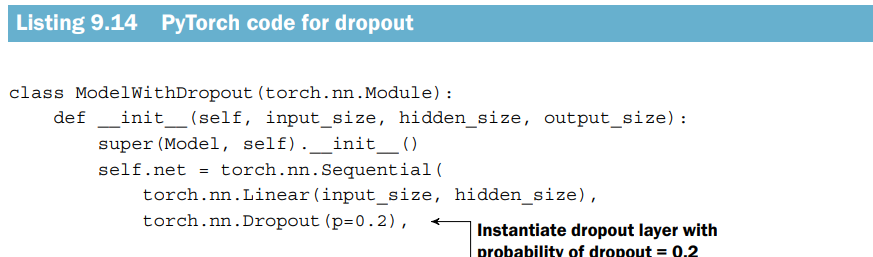

## Early Stopping
- Early stopping is a regularization technique that is used to prevent overfitting in machine learning models.
- Early stopping works by monitoring the validation error of the model during training and stopping the training process when the validation error starts to increase, which is a sign that the model is starting to overfit the training data.
- Early stopping is a very effective regularization technique that can improve the generalization performance of machine learning models.


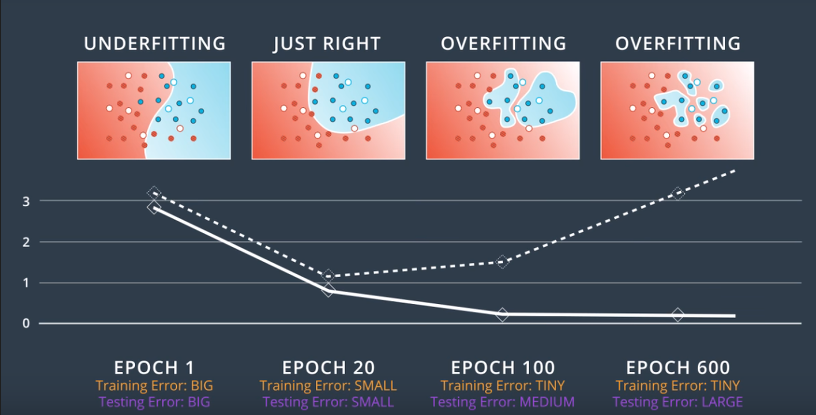![image.png](attachment:image.png)

![image.png](attachment:image.png)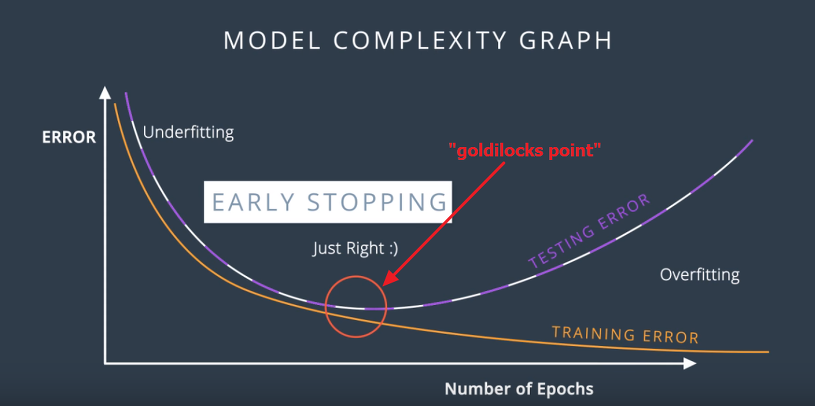

#### Load and Batch the Data

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

def create_datasets(batch_size):

    # percentage of training set to use as validation
    valid_size = 0.2

    # convert data to torch.FloatTensor
    transform = transforms.ToTensor()

    # choose the training and test datasets
    train_data = datasets.MNIST(root='data',
                                train=True,
                                download=True,
                                transform=transform)

    test_data = datasets.MNIST(root='data',
                               train=False,
                               download=True,
                               transform=transform)

    # obtain training indices that will be used for validation
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # load training data in batches
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=0)

    # load validation data in batches
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=valid_sampler,
                                               num_workers=0)

    # load test data in batches
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_size,
                                              num_workers=0)

    return train_loader, test_loader, valid_loader

### Define the Network
Defining a simple MLP model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

### Specify Loss Function and Optimizer

In [ ]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(model.parameters())

### Import the Early Stopping Class

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

### Train the Model using Early Stopping

In [ ]:
def train_model(model, batch_size, patience, n_epochs):

    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = []

    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch, (data, target) in enumerate(train_loader, 1):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)

        epoch_len = len(str(n_epochs))

        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')

        print(print_msg)

        # clear lists to track next epoch
        train_losses = []
        valid_losses = []

        # early_stopping needs the validation loss to check if it has decresed,
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [ ]:
batch_size = 256
n_epochs = 100

train_loader, test_loader, valid_loader = create_datasets(batch_size)

# early stopping patience; how long to wait after last time validation loss improved.
patience = 20

model, train_loss, valid_loss = train_model(model, batch_size, patience, n_epochs)

### Visualizing the Loss and the Early Stopping Checkpoint
From the plot we can see that the last Early Stopping Checkpoint was saved right before the model started to overfit.

In [ ]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

### Test the Trained Network

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

### Visualize Sample Test Results

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))